# Word Vector Generation

This Code is ~~

## Requirement

In [81]:
import numpy as np
import pandas as pd

## Data Processing

In [82]:
df = pd.read_csv('dataset/20231201/scopus.csv',header=0)

In [83]:
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Adarsh P.; Rathi P.; Kumar M.,"Adarsh, Pranav (57216787639); Rathi, Pratibha ...",57216787639; 57216789440; 57201849165,YOLO v3-Tiny: Object Detection and Recognition...,2020,2020 6th International Conference on Advanced ...,NaN,NaN,9074315,687,...,978-172815197-7,NaN,NaN,English,"Int. Conf. Adv. Comput. Commun. Syst., ICACCS",Conference paper,Final,NaN,Scopus,2-s2.0-85084648204
1,Ang T.H.; Sultana F.S.A.; Hutmacher D.W.; Wong...,"Ang, T.H. (15749053900); Sultana, F.S.A. (1574...",15749053900; 15749568900; 24288865000; 1330995...,Fabrication of 3D chitosan-hydroxyapatite scaf...,2002,Materials Science and Engineering C,20,1-2,NaN,35,...,NaN,NaN,NaN,English,Mater. Sci. Eng. C,Article,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-0037205338
2,Herr H.; Wilkenfeld A.,"Herr, Hugh (7103191241); Wilkenfeld, Ari (5531...",7103191241; 55310127900,User-adaptive control of a magnetorheological ...,2003,Industrial Robot,30,1,NaN,42,...,NaN,IDRBA,NaN,English,Ind Robot,Article,Final,NaN,Scopus,2-s2.0-0037265402
3,Wada K.; Shibata T.; Saito T.; Tanie K.,"Wada, Kazuyoshi (7401668359); Shibata, Takanor...",7401668359; 56890247700; 55476972500; 55951046600,Effects of robot-assisted activity for elderly...,2004,Proceedings of the IEEE,92,11,NaN,1780,...,NaN,IEEPA,NaN,English,Proc. IEEE,Conference paper,Final,NaN,Scopus,2-s2.0-21244435192
4,Lorenz C.; Carlsen I.-C.; Buzug T.M.; Fassnach...,"Lorenz, C. (55486269900); Carlsen, I.-C. (6602...",55486269900; 6602113455; 6603425387; 700367860...,Multi-scale line segmentation with automatic e...,1997,Lecture Notes in Computer Science (including s...,1205,NaN,NaN,233,...,3540627340; 978-354062734-0,NaN,NaN,English,Lect. Notes Comput. Sci.,Conference paper,Final,NaN,Scopus,2-s2.0-61849147989


In [84]:
# parsing 'City data' from Affiliation
import warnings
warnings.filterwarnings(action='ignore') # Off waring message display 

prep_df = df
prep_df['City'] = None
prep_df['Country'] = None
for i in range(len(df)):
    try:
        prep_df['City'][i] = str.replace(str.split(prep_df['Affiliations'][i],',')[-2],' ', '')
        prep_df['Country'][i] = str.replace(str.split(prep_df['Affiliations'][i],',')[-1],' ', '')
    except:
        prep_df['City'][i] = None
print(f"{len(prep_df)} row are existed in raw data")

8800 row are existed in raw data


In [85]:
# Filtering Data that citation is over 1
print(f"{(len(prep_df)-len(prep_df[prep_df['Cited by'] >= 1]))} data are dropped becasue of citation (under 1)")
prep_df = prep_df[prep_df['Cited by'] >= 1]
prep_df.describe()

1577 data are dropped becasue of citation (under 1)


,Year,Page count,Cited by,Molecular Sequence Numbers,Conference code,PubMed ID
count,7223.000000,5175.000000,7223.000000,0.0,4.053000e+03,1.500000e+03
mean,2014.394850,9.171014,21.551018,NaN,2.808894e+05,5.489037e+07
std,6.625834,80.246337,58.435607,NaN,9.960079e+06,2.378707e+08
min,1974.000000,1.000000,1.000000,NaN,1.624500e+04,1.670073e+06
25%,2010.000000,5.000000,2.000000,NaN,8.942700e+04,2.042601e+07
50%,2016.000000,7.000000,7.000000,NaN,1.229650e+05,2.637648e+07
75%,2020.000000,10.000000,18.500000,NaN,1.554010e+05,3.239336e+07
max,2024.000000,5409.000000,1441.000000,NaN,6.342086e+08,2.006107e+09


In [86]:
# Drop none data
prep_df = prep_df[['DOI','Year','Country', 'Cited by','Index Keywords','Abstract']]
print(f"{(len(prep_df)-len(prep_df.dropna()))} data are dropped becasue of None object!")
prep_df = prep_df.dropna() # drop None data from dataset
prep_df[1:10]

457 data are dropped becasue of None object!


,DOI,Year,Country,Cited by,Index Keywords,Abstract
1,10.1016/S0928-4931(02)00010-3,2002,Singapore,268,medical application; Biocompatibility; Cell cu...,A new robotic desktop rapid prototyping (RP) s...
2,10.1108/01439910310457706,2003,UnitedStates,242,Adaptive control systems; Damping; Gait analys...,A magnetorheological knee prosthesis is presen...
3,10.1109/JPROC.2004.835378,2004,Japan,241,Drug therapy; Health care; Hospitals; Medical ...,Mental commit robots have been developed to pr...
4,10.1007/bfb0029242,1997,Germany,240,Computer vision; Image segmentation; Medicine;...,A new multi-scale segmentation technique for l...
5,10.1109/JSEN.2008.917481,2008,UnitedKingdom,450,Force control; Sensors; Surgical equipment; Ti...,Haptic perception plays a very important role ...
7,10.1109/ICRA.2015.7139386,2015,Germany,216,Acetone; Agricultural robots; Electromagnetic ...,A miniature robotic device that can fold-up on...
8,10.1126/SCIROBOTICS.AAZ7946,2020,UnitedStates,278,Bioelectric Energy Sources; Biosensing Techniq...,Existing electronic skin (e-skin) sensing plat...
9,10.1109/TRO.2008.924266,2008,UnitedStates,303,Electric network analysis; Experiments; Medica...,This paper presents the theoretical analysis a...
10,10.1016/j.arcontrol.2005.05.003,2005,Japan,244,Acceleration; Biomedical equipment; Control eq...,"In this paper, a medical forceps system with t..."


In [87]:
# dump preprocessed data
prep_df.to_csv('D:/CSED526_DataMining/dataset/20231201/preprocessed_data.csv',index=None)

## Technical Overview

### Prepare Data

In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize
import re # for regular expression
import random

In [8]:
import nltk
nltk.download('punkt') # download NLTK metadata

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
df = pd.read_csv('D:/CSED526_DataMining/dataset/20231201/preprocessed_data.csv')
df[1:10]

,DOI,Year,Country,Cited by,Index Keywords,Abstract
1,10.1016/S0928-4931(02)00010-3,2002,Singapore,268,medical application; Biocompatibility; Cell cu...,A new robotic desktop rapid prototyping (RP) s...
2,10.1108/01439910310457706,2003,UnitedStates,242,Adaptive control systems; Damping; Gait analys...,A magnetorheological knee prosthesis is presen...
3,10.1109/JPROC.2004.835378,2004,Japan,241,Drug therapy; Health care; Hospitals; Medical ...,Mental commit robots have been developed to pr...
4,10.1007/bfb0029242,1997,Germany,240,Computer vision; Image segmentation; Medicine;...,A new multi-scale segmentation technique for l...
5,10.1109/JSEN.2008.917481,2008,UnitedKingdom,450,Force control; Sensors; Surgical equipment; Ti...,Haptic perception plays a very important role ...
6,10.1109/ICRA.2015.7139386,2015,Germany,216,Acetone; Agricultural robots; Electromagnetic ...,A miniature robotic device that can fold-up on...
7,10.1126/SCIROBOTICS.AAZ7946,2020,UnitedStates,278,Bioelectric Energy Sources; Biosensing Techniq...,Existing electronic skin (e-skin) sensing plat...
8,10.1109/TRO.2008.924266,2008,UnitedStates,303,Electric network analysis; Experiments; Medica...,This paper presents the theoretical analysis a...
9,10.1016/j.arcontrol.2005.05.003,2005,Japan,244,Acceleration; Biomedical equipment; Control eq...,"In this paper, a medical forceps system with t..."


In [91]:
target_txt = ' '.join(df['Abstract'])
print(len(target_txt))
print('Example Sentance: ', target_txt[0:100])

# Do sentance toknize to input corpus using NLTK
sent_text = sent_tokenize(target_txt)
f = open("D:/CSED526_DataMining/dataset/20231201/abstracts.txt", 'w')
f.write(target_txt)
f.close()

8501790
Example Sentance:  Object detection has seen many changes in algorithms to improve performance both on speed and accura


### Word Cloud Generation

It is simillar to term-frequency analyiser

In [21]:
%reload_ext autoreload
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

f = open("D:/CSED526_DataMining/dataset/20231201/abstracts.txt", 'r')
target_txt = f.read()
f.close()

In [ ]:
# check 'STOPWORDS' list that is not a keywords 
print("Number of words that skipped",len(STOPWORDS))
STOPWORDS

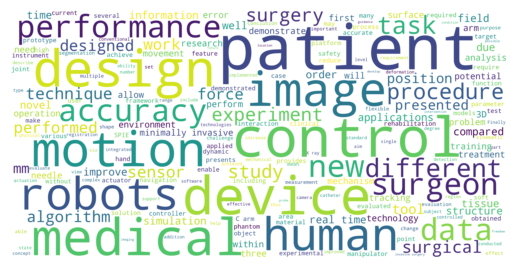

In [169]:
# Create and generate a word cloud image:
import copy
custom_STOPWORDS = copy.deepcopy(STOPWORDS)
custom_STOPWORDS.add('IEEE')
custom_STOPWORDS.add('paper')
custom_STOPWORDS.add('based')
custom_STOPWORDS.add('using')
custom_STOPWORDS.add('used')
custom_STOPWORDS.add('use')
custom_STOPWORDS.add('provide')
custom_STOPWORDS.add('proposed')
custom_STOPWORDS.add('propose')
custom_STOPWORDS.add('method')
custom_STOPWORDS.add('methods')
custom_STOPWORDS.add('model')
custom_STOPWORDS.add('result')
custom_STOPWORDS.add('results')
custom_STOPWORDS.add('development')
custom_STOPWORDS.add('developed')
custom_STOPWORDS.add('present')
custom_STOPWORDS.add('approach')
custom_STOPWORDS.add('show')
custom_STOPWORDS.add('system')
custom_STOPWORDS.add('systems')
custom_STOPWORDS.add('robot')
custom_STOPWORDS.add('robotic')
custom_STOPWORDS.add('robotics')
custom_STOPWORDS.add('application')

custom_STOPWORDS.add('one')
custom_STOPWORDS.add('two')

wordcloud = WordCloud(
    width = 800,
    height = 400,
    scale = 5,
    max_font_size=100, 
    max_words=200, 
    prefer_horizontal=1,
    normalize_plurals = True,
    stopwords= custom_STOPWORDS,
    background_color="white").generate(target_txt)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [182]:
# the most frequent keywords
key_list = list(wordcloud.words_.keys())
for i in range(30):
    print(key_list[i],' - ', wordcloud.words_[key_list[i]])

patient  -  1.0
control  -  0.7810754189944135
device  -  0.7143854748603352
design  -  0.6581703910614525
medical  -  0.6529329608938548
motion  -  0.583449720670391
image  -  0.5604050279329609
human  -  0.5202513966480447
robots  -  0.5122206703910615
performance  -  0.5097765363128491
new  -  0.5027932960893855
accuracy  -  0.4979050279329609
surgeon  -  0.4713687150837989
data  -  0.46368715083798884
different  -  0.4556564245810056
task  -  0.4402932960893855
procedure  -  0.4371508379888268
experiment  -  0.4238826815642458
surgery  -  0.42178770949720673
study  -  0.40782122905027934
surgical  -  0.4064245810055866
technique  -  0.4001396648044693
sensor  -  0.39839385474860334
algorithm  -  0.3956005586592179
work  -  0.392108938547486
performed  -  0.38093575418994413
force  -  0.38023743016759776
designed  -  0.37814245810055863
presented  -  0.37814245810055863
position  -  0.3729050279329609


In [175]:
list(wordcloud.words_.keys())

['patient',
 'control',
 'device',
 'design',
 'medical',
 'motion',
 'image',
 'human',
 'robots',
 'performance',
 'new',
 'accuracy',
 'surgeon',
 'data',
 'different',
 'task',
 'procedure',
 'experiment',
 'surgery',
 'study',
 'surgical',
 'technique',
 'sensor',
 'algorithm',
 'work',
 'performed',
 'force',
 'designed',
 'presented',
 'position',
 'mm',
 'tool',
 'applications',
 'novel',
 'real time',
 'information',
 'tissue',
 'well',
 'compared',
 'time',
 'field',
 'order',
 'improve',
 'due',
 'structure',
 'simulation',
 'minimally invasive',
 'training',
 'problem',
 'needle',
 '3D',
 'research',
 'movement',
 'technology',
 'allow',
 'will',
 'mechanism',
 'demonstrate',
 'operation',
 'first',
 'potential',
 'three',
 'error',
 'arm',
 'environment',
 'need',
 'within',
 'analysis',
 'surface',
 'tracking',
 'perform',
 'treatment',
 'manipulator',
 'parameter',
 'applied',
 'feature',
 'experimental',
 'models',
 'provides',
 'point',
 'process',
 'user',
 'soft',
 '

### Tokenize data

In [11]:
# Remove dots for each sentance and change upper case to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Do word toknize to input sentance using NLTK
result = [word_tokenize(sentence) for sentence in normalized_text]

print('Number of total samples : {}'.format(len(result)))
# print 3 random samples
idx = round(random.random()*1000)
for line in result[idx:idx+3]:
    print(line)

Number of total samples : 61025
['the', 'research', 'summarized', 'here', 'is', 'multidisciplinary', 'and', 'cutting', 'edge', 'that', 'will', 'ultimately', 'help', 'improve', 'the', 'treatment', 'of', 'ligament', 'injuries']
['the', 'material', 'presented', 'should', 'serve', 'as', 'an', 'inspiration', 'to', 'future', 'investigators']
['2004', 'elsevier', 'ltd', 'all', 'rights', 'reserved']


In [19]:
total_text = ''.join(normalized_text)
total_text[0:1000]
total_words = str.split(total_text, ' ')
unique_set = set(total_words)
print(f"Total  Words: {len(total_words)}")
print(f"Unique Words: {len(unique_set)}")

Total  Words: 1288721
Unique Words: 26596


### Train Data (Ganerate Wordvector)

Information of Hyper paramater
- vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [185]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [191]:
model_result = model.wv.most_similar("linkage")
print(model_result)

[('bar', 0.882911741733551), ('pulley', 0.8777276873588562), ('prismatic', 0.8775054216384888), ('revolute', 0.8741666078567505), ('rotary', 0.8662064671516418), ('articulating', 0.86451256275177), ('parallelogram', 0.8640338778495789), ('flexure', 0.8627767562866211), ('slider', 0.8618797659873962), ('spm', 0.8609126806259155)]


In [78]:
# The most frequent word in corpus
model.wv.index_to_key[1:20]

['of',
 'and',
 'to',
 'a',
 'in',
 'is',
 'for',
 'with',
 'this',
 'on',
 'that',
 'are',
 'by',
 'as',
 'an',
 'system',
 'we',
 'robot',
 'can']

In [64]:
# fetch the embeding vector of specific words
model.wv['robots']

array([-0.08871527, -0.21620394, -2.4956758 ,  0.07274448,  0.33875898,
       -1.9960005 , -0.8185628 ,  1.7501794 , -0.72107816, -0.39171696,
       -1.3122587 ,  1.1857251 , -0.53026175,  0.695527  ,  2.2210977 ,
       -1.2667611 , -1.8036064 ,  0.3300089 ,  3.0269349 ,  1.3164294 ,
        1.091648  , -0.23143236, -1.5544237 ,  1.7221429 , -0.18688485,
       -0.44203356, -3.4549658 ,  1.6579937 ,  1.1429659 ,  0.07740561,
       -0.0793185 , -0.00998063,  0.14131637,  0.10314058,  1.5016928 ,
        0.4477636 ,  1.6927688 ,  0.7221444 , -2.656937  ,  1.02864   ,
       -0.84828347, -0.09422617,  0.75832826,  2.2463694 , -1.0234054 ,
        1.2074031 , -0.26209146,  1.281646  ,  1.6578716 , -0.7434019 ,
       -0.23893262, -1.2102935 ,  0.49888122, -1.0187364 ,  4.1264167 ,
       -0.48346364, -1.0446781 , -0.83978957, -0.99976707, -0.8300995 ,
       -0.73753256,  0.71928734, -0.05166335,  3.194518  , -0.21641055,
        0.24323028,  2.9493186 , -0.20458801,  0.80305666,  0.65

In [195]:
model.syn1

AttributeError: 'Word2Vec' object has no attribute 'syn1'

## Generate Term-document count matrices

Goal: Generate single vector for each documents

In [25]:
import copy

target_words = unique_set - STOPWORDS
print(len(unique_set))
print(len(target_words))

26596
26457


192

In [92]:
df = pd.read_csv('D:/CSED526_DataMining/dataset/20231201/preprocessed_data.csv')
df

,DOI,Year,Country,Cited by,Index Keywords,Abstract
0,10.1109/ICACCS48705.2020.9074315,2020,India,242,Deep learning; Face recognition; Learning algo...,Object detection has seen many changes in algo...
1,10.1016/S0928-4931(02)00010-3,2002,Singapore,268,medical application; Biocompatibility; Cell cu...,A new robotic desktop rapid prototyping (RP) s...
2,10.1108/01439910310457706,2003,UnitedStates,242,Adaptive control systems; Damping; Gait analys...,A magnetorheological knee prosthesis is presen...
3,10.1109/JPROC.2004.835378,2004,Japan,241,Drug therapy; Health care; Hospitals; Medical ...,Mental commit robots have been developed to pr...
4,10.1007/bfb0029242,1997,Germany,240,Computer vision; Image segmentation; Medicine;...,A new multi-scale segmentation technique for l...
...,...,...,...,...,...,...
6761,10.2514/6.1992-1625,1992,UnitedStates,1,Manipulators; Medical robotics; Space shuttles...,The challenges of flying an American Space Sta...
6762,10.1016/0169-7439(93)89007-W,1993,UnitedStates,1,automation; clinical laboratory; conference pa...,Introducing automation principles into the cli...
6763,10.1007/BF00992955,1986,UnitedStates,1,computer analysis; hospital automation; hospit...,Executives of small hospitals and home health ...
6764,10.3233/978-1-60750-873-1-435,1996,Germany,1,Algorithms; Computer Simulation; Computer Syst...,This paper describes the development of a syst...


In [112]:
from tqdm import tqdm 

sorted_words = sorted(target_words)
doc_vector = np.zeros((len(sorted_words),len(df))) # (words) X (docs)
# generate vector for each document
for id in tqdm(range(len(df)), desc="Document Vector Generation"):
    # calculate frequency
    wordcloud = WordCloud(
        max_words=len(target_words), 
        normalize_plurals = True).generate(df['Abstract'][id])
    for iw in range(len(sorted_words)):
        if wordcloud.words_.get(sorted_words[iw]):
            doc_vector[iw,id] = wordcloud.words_[sorted_words[iw]]
        else:
            doc_vector[iw,id] = wordcloud.words_[sorted_words[iw]] = 0

Document Vector Generation:   0%|          | 0/6766 [00:00<?, ?it/s]

Document Vector Generation: 100%|██████████| 6766/6766 [15:13<00:00,  7.41it/s]


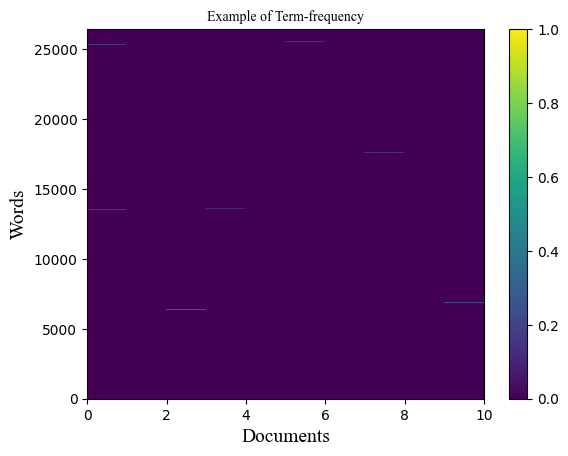

In [120]:
# heatmap by plt.pcolor()
plt.pcolor(doc_vector[:,0:10])
plt.title('Example of Term-frequency', fontsize=20, font='Times New Roman')
plt.xlabel('Documents', fontsize=14, font='Times New Roman')
plt.ylabel('Words', fontsize=14, font='Times New Roman')
plt.colorbar()

In [121]:
# save Data
doc_vector.dump("D:/CSED526_DataMining/dataset/20231201/document_frequency.npy")

In [122]:
# save words data
import csv
list_name = sorted_words

with open("D:/CSED526_DataMining/dataset/20231201/word_list.csv", 'w') as file:
    writer = csv.writer(file)
    writer.writerow(list_name)

In [46]:
# word set에 숫자가 많이 나오길래, 숫자가 얼마나 나오는지 확인. 생각보다 빈도수가 높음. 숫자만으로 이루어진 word는 제외해도 될 듯 함.
for i, value in enumerate(target_words):
    if str.isdigit(value):
        print(f"Value: {value}, Count: {list(total_words).count(value)}")

vlaue: 941527, Count: 1
vlaue: 429, Count: 3
vlaue: 729, Count: 1
vlaue: 9999, Count: 2
vlaue: 626, Count: 1
vlaue: 067, Count: 1
vlaue: 630, Count: 1
vlaue: 911, Count: 1
vlaue: 087, Count: 1
vlaue: 0012, Count: 1
vlaue: 1000, Count: 12
vlaue: 181, Count: 1
vlaue: 234, Count: 1
vlaue: 778, Count: 1
vlaue: 144, Count: 3
vlaue: 193, Count: 1
vlaue: 805, Count: 1
vlaue: 763, Count: 1
vlaue: 9998, Count: 1
vlaue: 7887, Count: 1
vlaue: 288, Count: 1
vlaue: 56, Count: 33
vlaue: 337, Count: 1
vlaue: 1260, Count: 1
vlaue: 299, Count: 1
vlaue: 120, Count: 28
vlaue: 37, Count: 42
vlaue: 297, Count: 1
vlaue: 246, Count: 1
vlaue: 29, Count: 42
vlaue: 21, Count: 77
vlaue: 008, Count: 2
vlaue: 054, Count: 1
vlaue: 1310, Count: 1
vlaue: 2, Count: 1375
vlaue: 647, Count: 1
vlaue: 0191, Count: 1
vlaue: 1100, Count: 2
vlaue: 201, Count: 1
vlaue: 098, Count: 1
vlaue: 346, Count: 1
vlaue: 904, Count: 2
vlaue: 7549, Count: 1
vlaue: 996, Count: 1
vlaue: 3625, Count: 1
vlaue: 2636, Count: 1
vlaue: 85, Count

## Load Data

In [141]:
# load NaN data
import pandas as pd

df = pd.read_csv(r"D:\CSED526_DataMining\dataset\20231201\preprocessed_data.csv")
print(df.head())
print(type(df))

                                DOI  Year       Country  Cited by  \
0  10.1109/ICACCS48705.2020.9074315  2020         India       242   
1     10.1016/S0928-4931(02)00010-3  2002     Singapore       268   
2         10.1108/01439910310457706  2003  UnitedStates       242   
3         10.1109/JPROC.2004.835378  2004         Japan       241   
4                10.1007/bfb0029242  1997       Germany       240   

                                      Index Keywords  \
0  Deep learning; Face recognition; Learning algo...   
1  medical application; Biocompatibility; Cell cu...   
2  Adaptive control systems; Damping; Gait analys...   
3  Drug therapy; Health care; Hospitals; Medical ...   
4  Computer vision; Image segmentation; Medicine;...   

                                            Abstract  
0  Object detection has seen many changes in algo...  
1  A new robotic desktop rapid prototyping (RP) s...  
2  A magnetorheological knee prosthesis is presen...  
3  Mental commit robots have

In [138]:
# load numeric data
import numpy as np

doc_vec = np.load(r"D:\CSED526_DataMining\dataset\20231201\document_frequency.npy",allow_pickle=True)
print(np.shape(doc_vec))
print(type(doc_vec))

(26457, 6766)
<class 'numpy.ndarray'>


In [142]:
# load meta data for numeric data
import csv

word_list = list()
f = open(r"D:\CSED526_DataMining\dataset\20231201\word_list.csv",'r')
rea = csv.reader(f)
for row in rea: word_list.append(row); f.close
word_list = word_list[0] # remove un-used dimension of list

print(word_list)
print(type(word_list))

['', '0', '00', '000', '0001', '000129', '00015', '0002', '0004', '0005', '0007', '0008', '001', '0012', '0014', '001m', '002', '0020mm', '0027mm', '003', '0030', '003153', '0032', '0035', '004', '0042msv', '0044', '0044mm', '004mm', '005', '0050', '005m', '006', '007', '008', '009', '00mm', '01', '010', '011', '01167', '0124', '013', '014', '0143', '015', '0156', '0164', '017', '0175', '0178', '018', '019', '0190', '0191', '0192', '01953', '0198', '01mm', '02', '020', '0205', '021', '023', '025', '027', '028', '0284', '02hz', '02mm', '03', '032', '0328', '034', '035', '037', '03mm', '04', '043', '0452', '046', '0468', '047', '048', '0493', '04mm', '05', '050', '052', '053', '054', '056', '0586', '0597', '05mm', '05n', '05nm', '06', '062', '065', '0660', '067', '0678', '069', '06mm', '07', '071', '0713', '072', '073mm', '076', '07716', '078', '07mm', '08', '080', '083', '085', '086', '087', '089', '089mm', '08hz', '09', '092', '093', '096', '098', '09cm', '09hz', '0mm', '0pm', '0rpm', 